# Relatorio de Analise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14 ,6))

In [12]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

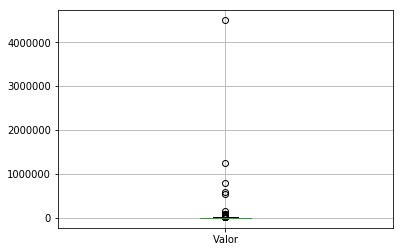

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor m2,Tipo Agregado
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN,4907.98,Apartamento
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN,15000.00,Apartamento


In [5]:
valor = dados['Valor']

In [8]:
q1 = valor.quantile(0.25)
q3 = valor.quantile(0.75)

In [14]:
IIQ = q3 - q1
limite_inferior = q1 - 1.5 * IIQ
limite_superior = q3 + 1.5 * IIQ

In [15]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

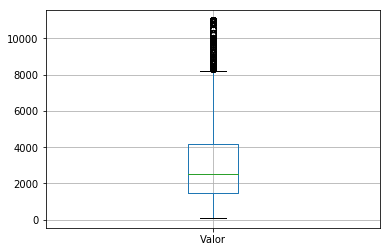

In [16]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F14803128>]],
      dtype=object)

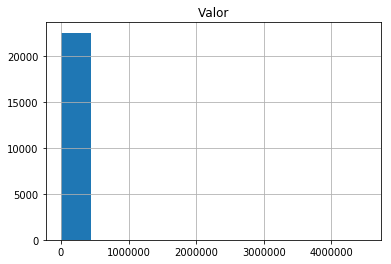

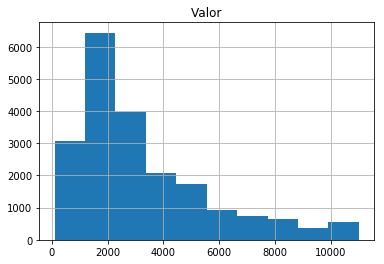

In [17]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers por Grupo

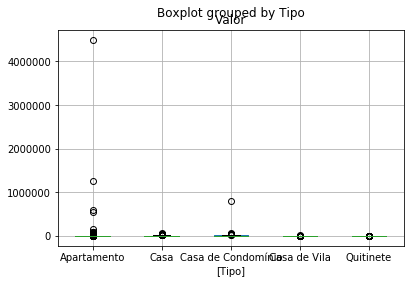

In [18]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [21]:
grupo_tipo = dados.groupby('Tipo')

In [23]:
grupo_tipo = dados.groupby('Tipo')['Valor']
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [24]:
limite_superior['Apartamento']

10100.0

In [25]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [26]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]

In [27]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

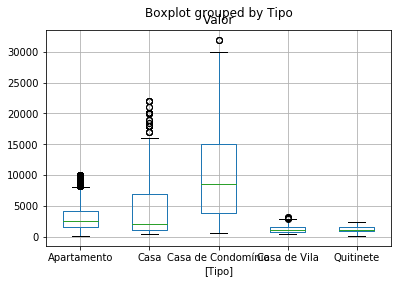

In [28]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [29]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)